# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


In [3]:
def step(n=0, N=20):
    # Check that the parameter are valid
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    
    # Create the array
    s = np.zeros((N, ))
    # Create the ramp
    for idx_s in np.arange(n, N):
        s[idx_s] = 1
    
    return s

In [4]:
def dirac(n=0, N=20):
    # Check that the parameter are valid
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    
    # Create the array
    s = np.zeros((N, ))
    # Place the dirac
    s[n] = 1
    
    return s

In [5]:
def geo(a=np.exp, n=0, N=20):
    # Check that the parameter are valid
    if n > N - 1:
        raise ValueError('n should be inferior to N-1')
    
    # Create the array
    s = np.zeros((N, ))
    # Create the ramp
    for incr, idx_s in enumerate(np.arange(n, N)):
        s[idx_s] = a ** incr
    
    return s

## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

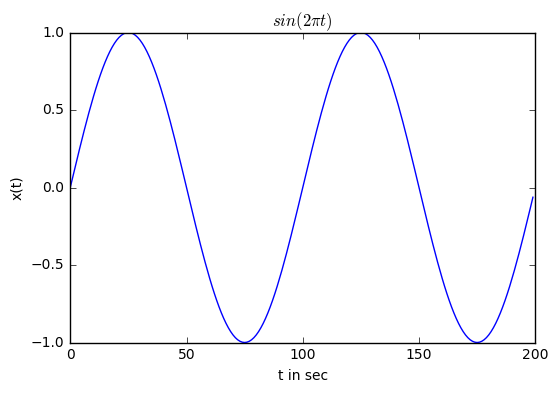

In [6]:
# samples from 0 to 2 with 0.01 steps 
t = np.arange(0, 2, 0.01)
s = np.sin(2*np.pi*t)
plt.figure
plt.plot(s)
plt.title('$sin(2\pi t)$')
plt.xlabel('t in sec')
plt.ylabel('x(t)')

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

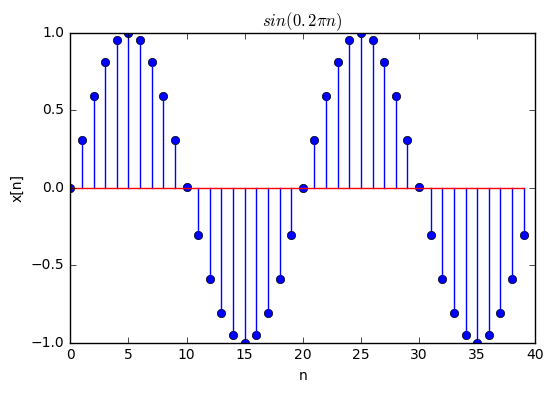

In [7]:
n = np.arange(0,40,1)
s = np.sin(0.1*np.pi*n)
plt.figure
plt.stem(s)
plt.title('$sin(0.2 \pi n)$')
plt.xlabel('n')
plt.ylabel('x[n]')

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

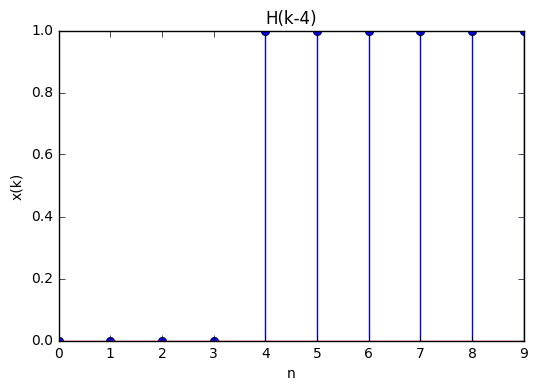

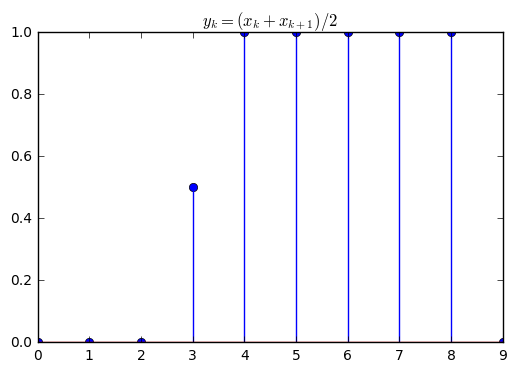

In [8]:
N = 10
## Step function H(k-4)
x = step(4,N) 
plt.figure
plt.stem(x)
plt.title('H(k-4)')
plt.xlabel('n')
plt.ylabel('x(k)')
plt.show()

## y(k) = (x(k)+x(k+1))/2
y = np.zeros((N,))
for i in range(0,N-1):
    y[i] = (x[i]+x[i+1])/2

plt.figure
plt.stem(y)
plt.title('$y_k = (x_k + x_{k+1})/2$')
plt.show()


**1.2** Propose a modification to obtain a causal version

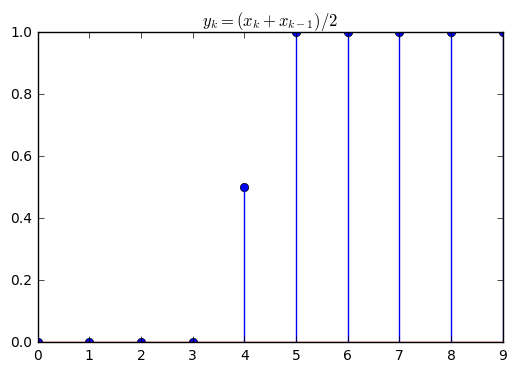

In [9]:
# y(k) = (x(k)+x(k-1))/2
y = np.zeros((N,))
for i in range(1,N):
    y[i] = (x[i]+x[i-1])/2

plt.figure
plt.stem(y)
plt.title('$y_k = (x_k + x_{k-1})/2$')
plt.show()

Comments on your observations

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



In [10]:
def prim(f):
    F = np.zeros((N,))
    F[0] = f[0]
    for i in range (1, len(f)):
        F[i] = F[i-1]+f[i]*1 
    
    return F

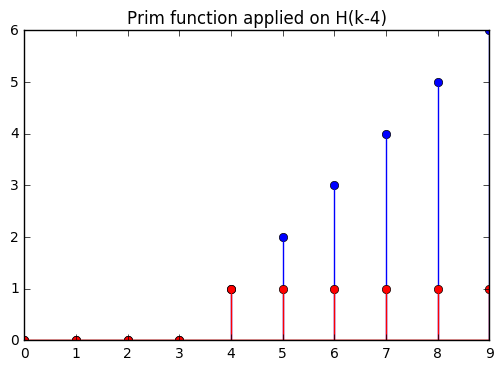

In [11]:
N = 10
f = step(4,N)
F = prim(f)

plt.figure
plt.stem(F)
plt.stem(f, 'r', markerfmt='ro')
plt.title('Prim function applied on H(k-4)')


**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

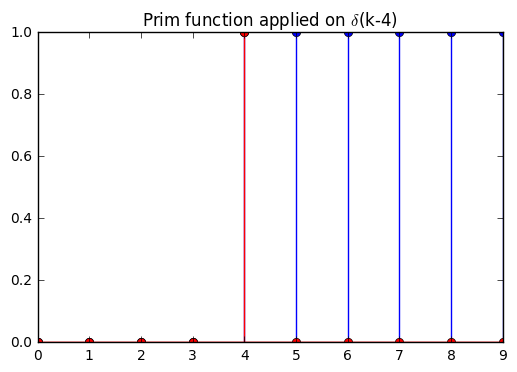

In [12]:
f = dirac(4,N)
F = prim(f)

plt.figure
plt.stem(F)
plt.stem(f, 'r', markerfmt='ro')
plt.title('Prim function applied on $\delta$(k-4)')

**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

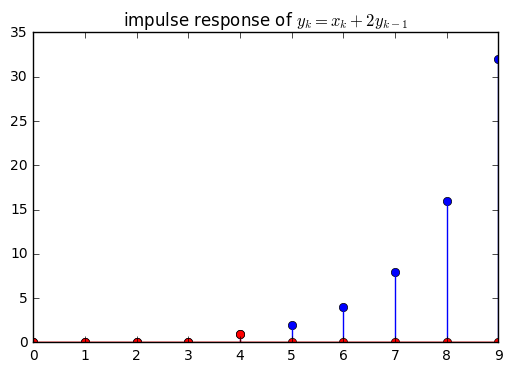

In [13]:
x = dirac(4,N)
y = np.zeros((N,))
y[0] = x[0]
for i in range(1,N):
    y[i] = x[i]+ 2*y[i-1]

plt.figure
plt.stem(y)
plt.stem(x, 'r', markerfmt='ro')
plt.title('impulse response of $y_k=x_k+2y_{k-1}$')


**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

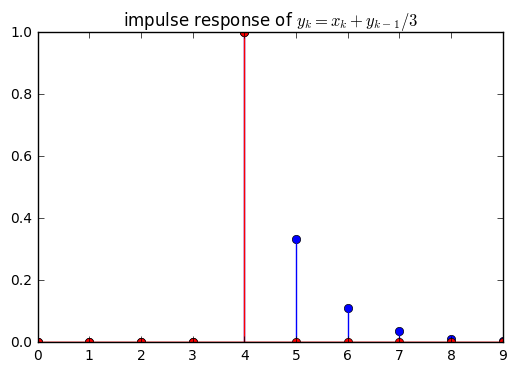

In [14]:
x=dirac(4,N)
y = np.zeros((N,))
y[0] = x[0]
for i in range(1,N):
    y[i] = x[i]+ (y[i-1]/3)

plt.figure
plt.stem(y)
plt.stem(x, 'r', markerfmt='ro')
plt.title('impulse response of $y_k=x_k+y_{k-1}/3$')

Comments your observations

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


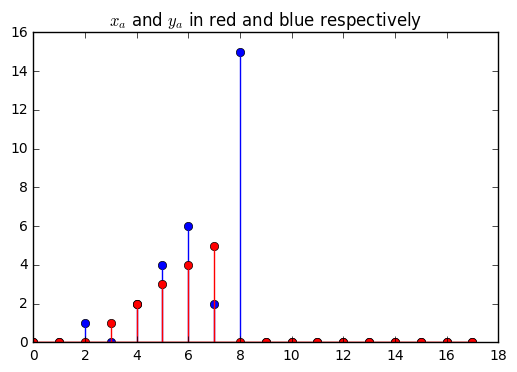

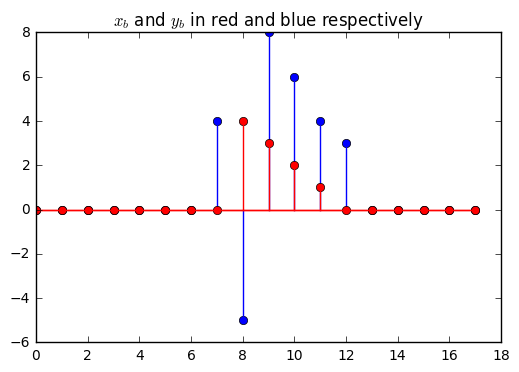

In [15]:
x_a = np.array([0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x_b = np.array([0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0])
N = len(x_a)
y_a = np.zeros((N,))
y_b = np.zeros((N,))
for i in range (1, N - 1):
    y_a[i] = 3. * x_a[i - 1] - 2. * x_a[i] + x_a[i + 1]
    y_b[i] = 3. * x_b[i - 1] - 2. * x_b[i] + x_b[i + 1]

plt.figure
plt.stem(y_a)
plt.stem(x_a, 'r-', markerfmt='ro')
plt.title('$x_a$ and $y_a$ in red and blue respectively')
plt.show()
    
plt.figure
plt.stem(y_b)
plt.stem(x_b, 'r-', markerfmt='ro')
plt.title('$x_b$ and $y_b$ in red and blue respectively')
plt.show()

**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


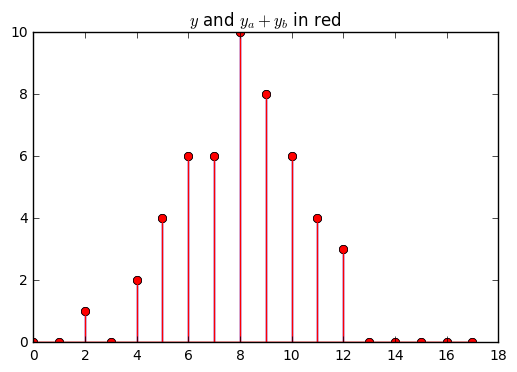

In [19]:
x = x_a + x_b

y = np.zeros((N,))

for i in range(1, N - 1):
    y[i]= 3. * x[i - 1] - 2. * x[i] + x[i + 1]

da = y - (y_a + y_b)
# print da
plt.figure
plt.stem(y)
plt.stem(y_a + y_b, 'r-',markerfmt='ro')
plt.title('$y$ and $y_a+y_b$ in red ')
plt.show()

**3.3** Propose a nonlinear/noninvariant system.